# Chapter3. 신경망

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100%!important;}</style>"))

In [2]:
from IPython.display import Image
import numpy as np
import matplotlib.pylab as plt

## 3.1 퍼셉트론에서 신경망으로

### 3.1.1 신경망의 예

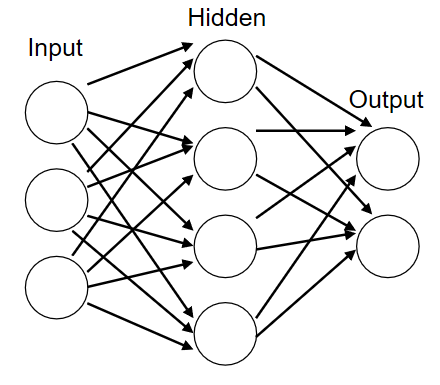

In [17]:
Image("image/3_layers.png")

- Input: 입력층
- Hidden: 은닉층
- Output: 출력층

위 그림의 신경망은 모두 3층으로 구성되지만, 가중치를 갖는 층은 두 개뿐이기 때문에 '2층 신경망'이라고 한다!

### 3.1.2 활성화 함수의 등장

**활성화 함수**
    
- 입력 신호의 총합을 출력 신호로 변환하는 함수, h(x)
- 다음과 같은 두 개의 식으로 나눌 수 있다!

> a = b+w1*x1+w2*x2<br/>y=h(a)

## 3.2 활성화 함수

### 3.2.1 시그모이드 함수

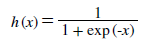

In [18]:
Image("image/sigmoid.png")

=> 신경망에서 자주 이용하는 활성화 함수, 신경망에서는 활성화 함수로 시그모이드 함수를 이용하여 신호를 변환하고 그 변환된 신호를 다음 뉴런에 전달한다.

### 3.2.2 계단 함수 구현하기

In [3]:
# 실수만 입력 가능

def step_function(x):
    
    if x > 0:
        return 1
    else:
        return 0

In [4]:
# 입력값으로 배열도 지원하도록 수정

def step_function(x):

    y = x > 0 # bool 값을 반환
    
    return y.astype(np.int) # False=0, True=1

### 3.2.3 계단 함수의 그래프

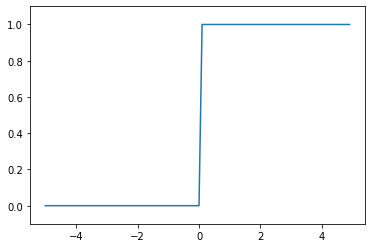

In [5]:
X = np.arange(-5.0, 5.0, 0.1) # 0.1간격
Y = step_function(X)

plt.plot(X, Y)
plt.ylim(-0.1, 1.1)  # y축의 범위 지정
plt.show()

=> 0을 경계로 출력이 0에서 1로 바뀜

### 3.2.4 시그모이드 함수 구현하기

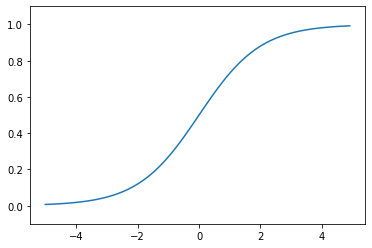

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)

plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()

=> 계단 함수보다 매끄럽다!

### 3.2.5 비선형 함수

시그모이드 함수와 계단 함수는 모두 **비선형 함수**이다.

- 선형함수: 출력이 입력의 상수배만큼 변하는 함수
- 비선형함수: 선형이 아닌 함수

**신경망에서는 활성화 함수로 비선형 함수를 이용해야 한다!**

>h(x) = cx(선형함수)일 때, <br/> y(x) = h(h(h(x))) = c^3 * x = ax

    => 층을 깊게 하는 의미가 없어지게 됨..

### 3.2.6 ReLU 함수

입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하면 0을 출력해주는 함수

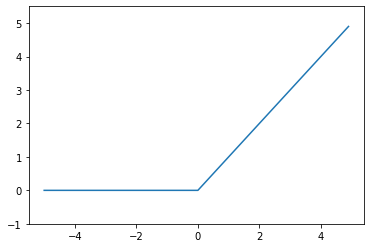

In [7]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

## 3.3 다차원 배열의 계산

### 3.3.1 신경망에서의 행렬 곱

In [8]:
X = np.array([1,2])
X.shape

(2,)

=> 1x2

In [9]:
W = np.array([[1,3,5], [2,4,6]])
print(W)

[[1 3 5]
 [2 4 6]]


=> 2x3

In [10]:
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


=> 1x3

다차원 배열의 스칼라곱을 구해주는 **np.dot** 함수를 이용하자!

## 3.4 3층 신경망 구현하기

### 3.4.1 각 층의 신호 전달 구현하기

A1 = X∙W1 + B1 <br/>
Z1 = sigmoid(A1) => 다음 층의 입력 값

In [11]:
# 입력층 -> 1층

X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)

print(A1)
print(Z1)


[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [12]:
# 1층 -> 2층

W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print(Z2)

[0.62624937 0.7710107 ]


In [13]:
# 2층 -> 출력층

W3 = np.array([[0.1, 0.3],[0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = A3

print(Y)

[0.31682708 0.69627909]


### 3.4.2 구현 정리

In [14]:
def init_network():
    
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3],[0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network


def forward(network, x):
    
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = a3
    
    return y

In [15]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 3.5 출력층 설계하기

신경망은 분류와 회귀 모두에 이용할 수 있지만, 둘 중 어떤 문제냐에 따라 출력층에서 사용하는 활성화 함수가 달라진다!<br/>
일반적으로 **회귀**에는 **항등 함수**를, **분류**에는 **소프트맥스 함수**를 사용한다

### 3.5.1 소프트맥스 함수 구현하기

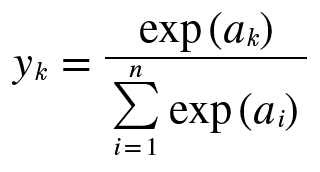

In [19]:
Image("image/softmax.png")

In [16]:
def softmax(a):
    
    c = np.max(a)
    exp_a = np.exp(a - c) # 오버플로우 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

**[오버플로우]** exp 함수 안에 너무 큰 수가 들어가면 inf 로 출력됨(NaN) <br/>
-> 입력 신호 중 최댓값을 빼주어 계산